<a href="https://colab.research.google.com/github/Anya-ova/pytorch_classifier/blob/main/pytorchClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:
transform = Compose(
    [ToTensor(),
     Normalize((0.485, 0.456, 0.406),
               (0.229, 0.224, 0.225))] # std. deviation
)

In [3]:
# transform = Compose(
#     [ToTensor(),
#      Normalize((0.5, 0.5, 0.5),  # mean
#                (0.5, 0.5, 0.5))] # std. deviation
# )

In [4]:
training_data = CIFAR10(root="./data",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
batch_size = 32
train_dataloader = DataLoader(training_data, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_data, 
                             batch_size=batch_size, 
                             shuffle=True)

In [6]:
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([32, 3, 32, 32])
Shape of y: torch.Size([32]) torch.int64


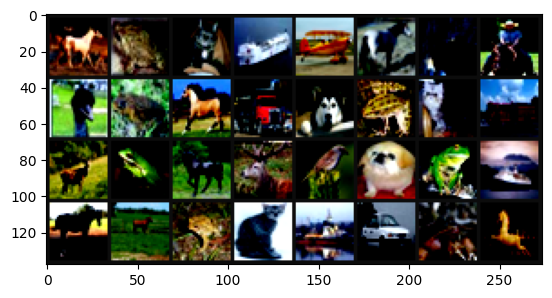

horse frog  cat   ship  airplane horse deer  horse bird  frog  horse truck dog   frog  cat   truck deer  frog  horse deer  bird  dog   frog  ship  horse horse frog  cat   ship  automobile frog  horse


In [7]:
def imshow(img):
  img = img / 2 + .05 # revert normalization for viewing
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
classes = training_data.classes
training_data.classes

dataiter = iter(train_dataloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d((2,2))
        self.conv2 = nn.Conv2d(6,16,5) 
        self.fc1 = nn.Linear(16*5*5, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.bn1 = nn.BatchNorm2d(num_features=6)
        self.bn2 = nn.BatchNorm2d(num_features=16)

    def forward(self, x):
       x = self.pool(F.relu(self.bn1(self.conv1(x))))
       x = self.pool(F.relu(self.bn2(self.conv2(x))))
       x = torch.flatten(x, 1)
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x
        
model = Net()
model.to(device)
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr=0.001, momentum=0.9 ) # momentum=0.9

In [11]:
list_for_print=[]

Сделать в эпохе обучение на тесте. Добавить цикл.

In [12]:
for epoch in range(15):
    size = len(train_dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
    
        pred = model(X)
        loss = loss_fn(pred, y)
 
        optimizer.zero_grad()
        loss.backward()
        list_for_print.append(loss.item())
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
    for batch, (X, y) in enumerate(test_dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        list_for_print.append(loss.item())
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 2.305175  [    0/50000]
loss: 1.795531  [    0/50000]
loss: 1.302777  [    0/50000]
loss: 1.349781  [    0/50000]
loss: 1.393729  [    0/50000]
loss: 1.059368  [    0/50000]
loss: 0.889305  [    0/50000]
loss: 0.910991  [    0/50000]
loss: 1.030827  [    0/50000]
loss: 0.989360  [    0/50000]
loss: 1.069004  [    0/50000]
loss: 0.990750  [    0/50000]
loss: 1.007409  [    0/50000]
loss: 0.958028  [    0/50000]
loss: 1.140051  [    0/50000]
loss: 0.841442  [    0/50000]
loss: 0.927833  [    0/50000]
loss: 0.964858  [    0/50000]
loss: 0.899099  [    0/50000]
loss: 0.778873  [    0/50000]
loss: 0.770178  [    0/50000]
loss: 0.574949  [    0/50000]
loss: 0.893098  [    0/50000]
loss: 1.000162  [    0/50000]
loss: 0.952819  [    0/50000]
loss: 0.702358  [    0/50000]
loss: 0.794012  [    0/50000]
loss: 0.568424  [    0/50000]
loss: 0.481711  [    0/50000]
loss: 0.658357  [    0/50000]


In [13]:
# list_for_print = [i.item() for i in list_for_print]

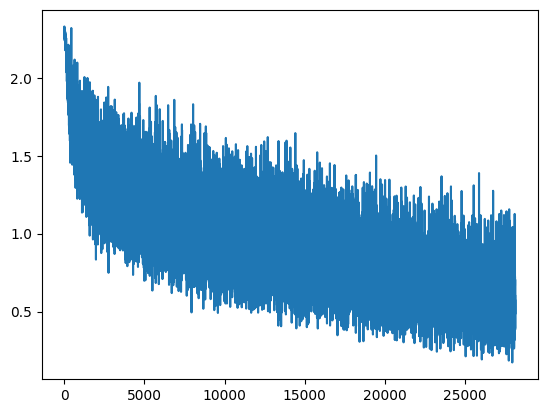

In [14]:
plt.plot(list_for_print)

In [15]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

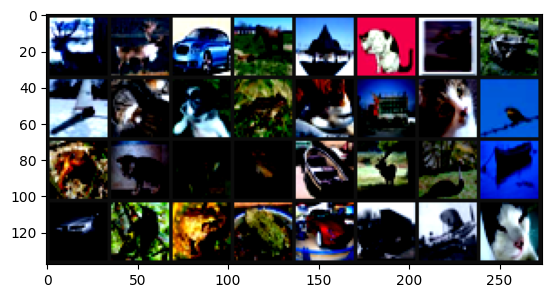

Ground Truth:  deer  deer  automobile horse airplane cat   deer  frog  ship  cat   dog   frog  cat   truck cat   bird  frog  cat   frog  bird  ship  deer  bird  ship  automobile bird  frog  frog  automobile truck airplane cat  


In [16]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
imshow(make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

In [17]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(32)))

Predicted:  deer  deer  automobile horse airplane cat   cat   bird  ship  cat   dog   frog  cat   truck cat   bird  horse dog   deer  bird  ship  deer  truck airplane automobile bird  frog  frog  automobile truck ship  cat  


In [18]:
correct = 0
total = 0
with torch.no_grad():
   for data in test_dataloader:
     images, labels = data
     outputs = model(images.cuda())
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels.cuda()).sum().item()
     
print(f'Model accuracy: {100 * correct // total} %')

Model accuracy: 85 %


In [19]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0  for classname in classes}
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    outputs = model(images.cuda())
    _, predictions = torch.max(outputs, 1)
    for label,prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class {classname:5s}: {accuracy:.1f}%')

Accuracy for class airplane: 90.0%
Accuracy for class automobile: 92.8%
Accuracy for class bird : 82.2%
Accuracy for class cat  : 75.4%
Accuracy for class deer : 79.4%
Accuracy for class dog  : 75.3%
Accuracy for class frog : 73.5%
Accuracy for class horse: 95.2%
Accuracy for class ship : 94.1%
Accuracy for class truck: 94.1%
